# Exploration of `ExPeCoN`

Running analyses and simulations of `ExPeCoN`

___

    Author:  Carina Forster et al.
    Contact: forster@cbs.mpg.de
    Years:   2023

___

## Setup 

In [5]:
# Import my expecon_ms package and other modules
from pathlib import Path

import numpy as np
from expecon_ms.configs import config, params, path_to

# Import my expecon_ms package and other modules
from expecon_ms.eeg.preprocessing import prepro as pp
from expecon_ms.eeg.preprocessing import ica
from expecon_ms.eeg.sensor import evokeds as evo

Last Commit Date for E:\expecon_ms\code\expecon_ms\behav\figure1.py : Fri Nov 17 11:05:57 2023 +0100
Last Commit Date for E:\expecon_ms\code\expecon_ms\eeg\sensor\evokeds.py : Sun Nov 19 11:33:39 2023 +0100


In [2]:
# Set global vars & paths

# this doesn't work for some reason
# the variables set here are not recognized in the functions

# raw concatenated eeg data
save_dir_concatenated_raw1 = Path(path_to.data.eeg.RAW_expecon1)
save_dir_concatenated_raw2 = Path(path_to.data.eeg.RAW_expecon2)
save_dir_concatenated_raw1.mkdir(parents=True, exist_ok=True)
save_dir_concatenated_raw2.mkdir(parents=True, exist_ok=True)

# stimulus locked
save_dir_stim_1 = Path(path_to.data.eeg.preprocessed.stimulus_expecon1)
save_dir_stim_2 = Path(path_to.data.eeg.preprocessed.stimulus_expecon2)
save_dir_stim_1.mkdir(parents=True, exist_ok=True)
save_dir_stim_2.mkdir(parents=True, exist_ok=True)

# cue locked
save_dir_cue_1 = Path(path_to.data.eeg.preprocessed.cue_expecon1)
save_dir_cue_2 = Path(path_to.data.eeg.preprocessed.cue_expecon2)
save_dir_cue_1.mkdir(parents=True, exist_ok=True)
save_dir_cue_2.mkdir(parents=True, exist_ok=True)

# directory that contains the cleaned epochs
dir_clean_epochs_expecon1 = Path(path_to.data.eeg.preprocessed.ica.clean_epochs_expecon1)
dir_clean_epochs_expecon2 = Path(path_to.data.eeg.preprocessed.ica.clean_epochs_expecon2)

# EEG cap layout file
filename_montage = Path(path_to.data.templates)
filename_montage.mkdir(parents=True, exist_ok=True)

# raw behavioral data
behav_path = Path(path_to.data.behavior)
behav_path.mkdir(parents=True, exist_ok=True)

# participant IDs
id_list_expecon1 = config.participants.ID_list_expecon1
id_list_expecon2 = config.participants.ID_list_expecon2

# pilot data counter (for expecon 1, participant ID starts with ID007)
pilot_counter = config.participants.pilot_counter

# data_cleaning parameters defined in config.toml
rt_max = config.behavioral_cleaning.rt_max
rt_min = config.behavioral_cleaning.rt_min
hitrate_max = config.behavioral_cleaning.hitrate_max
hitrate_min = config.behavioral_cleaning.hitrate_min
farate_max = config.behavioral_cleaning.farate_max
hit_fa_diff = config.behavioral_cleaning.hit_fa_diff

## Analyse 

Preprocess raw EEG data

In [2]:
# function expects a raw object with .fif file ending
pp.prepro(study=1, trigger='stimulus', l_freq=1, h_freq=40, tmin=-1,
        tmax=1, resample_rate=250,
        sf=2500, detrend=1, ransac=1, autoreject=0)

# how many channels were interpolated?
pp.n_channels_interpolated(study=1, trigger='stimulus', l_freq=0.1)

007 already exists
008 already exists
009 already exists
010 already exists
011 already exists
012 already exists
013 already exists
014 already exists
015 already exists
016 already exists
017 already exists
018 already exists
019 already exists
020 already exists
021 already exists
022 already exists
023 already exists
024 already exists
025 already exists
026 already exists
027 already exists
028 already exists
029 already exists
030 already exists
031 already exists
032 already exists
033 already exists
034 already exists
035 already exists
036 already exists
037 already exists
038 already exists
039 already exists
040 already exists
041 already exists
042 already exists
043 already exists
044 already exists
045 already exists
046 already exists
047 already exists
048 already exists
049 already exists
Done with preprocessing and creating clean epochs
mean channels interpolated 0.9767441860465116
std of channels interpolated: 1.2628081348257383
min channels interpolated: 0
max chann

run ICA on cleaned epochs

The file does not exist.
Reading E:\expecon_ms\data\eeg\prepro_stim_expecon1\P007_epochs_1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
719 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...
Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 58 components
Fitting ICA took 58.5s.
The file does not exist.
Reading E:\expecon_ms\data\eeg\prepro_stim_expecon1\P008_epochs_1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 17 columns
719 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging 

KeyboardInterrupt: 

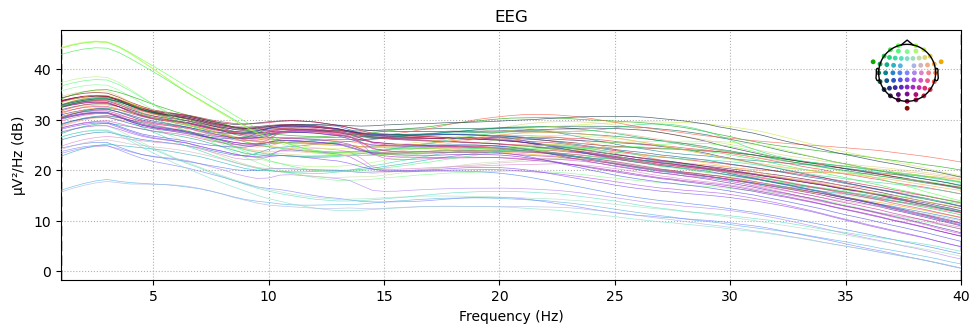

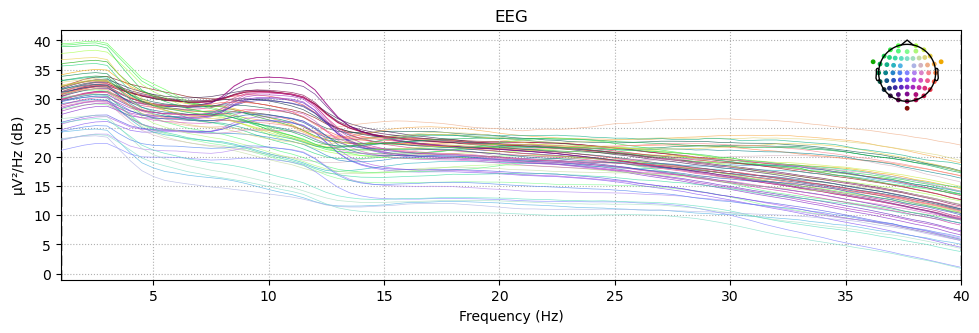

In [2]:
ica.run_ica(study=1, infomax=1, save_psd=1)
# correlate with EOG and ECG
ica.label_ica_correlation(study=1)
# usa icalabel to mark components for rejection
#ica.label_iclabel(study=1)

In [6]:
evo.create_contrast(study=2, drop_bads=True, laplace=True, subtract_evoked=True, save_data_to_disk=True)
evo.plot_roi(tmin=0.04, tmax=0.06, tmin_base=-0.2, tmax_base=-0.1, study=2)


Participant 0


FileNotFoundError: File does not exist: "E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr2\P001_icacorr_0.1Hz-epo.fif"

### Intermediate summary
This is a intermediate summary of the analysis.
We find this and that ...